<a href="https://colab.research.google.com/github/nay-uku/studia/blob/main/Natural%20language%20processing/z3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Utworzyć korpus wybranych dokumentów tekstowych (co najmniej 7 dokumentów), pochodzących z 3 różnych działów (np. ekonomia, sport, polityka, motoroyzacja etc.
2. Zbudować macierz DTM (Document Term Matrix) wykorzystując formy podstawowe słów.:
3. Wyodrębnić koncepty  z wykorzystaniem SVD:
a) wyznaczyć macierze U, S, V.
b) Przedstawić w postaci chmury tagów słowa należące do każdego tematu (wielkość słowa powinna odpowiadać sile związku słowa z tematem)
c) przedstawić w postaci wykresu radarowego tematy każdego z dokumentów 




In [ ]:
# Przygotowanie środowiska, komendy linux
# instalacja Morfeusza 2
!wget -O - http://download.sgjp.pl/apt/sgjp.gpg.key|sudo apt-key add -
!sudo apt-add-repository http://download.sgjp.pl/apt/ubuntu
!sudo apt update
!sudo apt install morfeusz2
!sudo apt install python3-morfeusz2


# instalacja spaCy

!python3 -m pip install spacy

# 1. instalacja modelu IPI PAN dla języka polskiego
!wget "http://zil.ipipan.waw.pl/SpacyPL?action=AttachFile&do=get&target=pl_spacy_model_morfeusz-0.1.3.tar.gz"
!mv 'SpacyPL?action=AttachFile&do=get&target=pl_spacy_model_morfeusz-0.1.3.tar.gz' pl_spacy_model_morfeusz-0.1.3.tar.gz
!python3 -m pip install pl_spacy_model_morfeusz-0.1.3.tar.gz

# linkowanie modelu do spaCy
!python3 -m spacy link pl_spacy_model_morfeusz pl_spacy_model_morfeusz -f

# 2. instalacja oficjalnego modelu spaCy
!python3 -m spacy download pl_core_news_lg

# dodatkowe zależności:
!python3 -m pip install tqdm
!python3 -m pip install networkx


In [ ]:
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/a1.txt > a1.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/a2.txt > a2.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/a3.txt > a3.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/b1.txt > b1.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/b2.txt > b2.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/b3.txt > b3.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/h1.txt > h1.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/h2.txt > h2.txt
!curl https://raw.githubusercontent.com/karbar57/artykuly/main/h3.txt > h3.txt

import glob
books = sorted(glob.glob('*.txt')) # artykuły: akordeon, bieganie, historia XX wieku
print(books)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9883  100  9883    0     0  52291      0 --:--:-- --:--:-- --:--:-- 52291
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10314  100 10314    0     0  56360      0 --:--:-- --:--:-- --:--:-- 56360
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9834  100  9834    0     0  61462      0 --:--:-- --:--:-- --:--:-- 61462
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4187  100  4187    0     0  26333      0 --:--:-- --:--:-- --:--:-- 26333
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
# ładowanie modelu
import spacy
import requests

nlp = spacy.load("pl_spacy_model_morfeusz") # IPI PAN
# nlp = spacy.load("pl_core_news_lg") # OFICJALNY

In [ ]:
# Utworzyć korpus wybranych dokumentów tekstowych (co najmniej 7 dokumentów), pochodzących z 3 różnych działów (np. ekonomia, sport, polityka, motoroyzacja etc.
corpus = []
for i in range(len(books)):
  with open(books[i],'r') as f:
    raw = f.read()
    split = raw.split()
    doc = nlp(raw) # tokenizacja
    corpus.append(doc)
corpus

In [ ]:
#Zbudować macierz DTM (Document Term Matrix) wykorzystując formy podstawowe słów.
tdm_corpus = [] # korpus rzeczowników
for doc in corpus:
  tdm_doc = ''
  for token in doc:
    if token.pos_ != 'NUM': # pominięcie liczb
      tdm_doc += token.lemma_ + ' '
  tdm_corpus.append(tdm_doc)
tdm_corpus # korpus z form podstawowych

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(tdm_corpus)
dtm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
dtm # Document Term Matrix

,15,20,500,absolutnie,absolwent,aby,accordeon,accordion,adidas,adios,adiutant,adizero,administracja,admiralicja,admirał,aerobik,aerobowy,affaires,afisz,afryka,afrykański,agent,agentka,agresja,agresywny,akademia,akademicki,akcja,akkordeon,akordeon,akordeonista,akordeonistka,akordeonistyce,akordeonistyka,akordeonistyki,akordeonowy,akt,aktor,aktualnie,aktualny,...,śmierć,śpiewać,średni,średnio,środek,środowy,śródziemny,świadczyć,świadectwo,świadek,świadomość,świadomy,świat,światełko,światowy,światło,świecić,świetnie,świeżo,świt,święcić,źle,źródło,żaden,że,żeby,żona,żołdak,żołnierz,żołądek,życie,życiodajny,życiówka,żyd,żywo,żyć,żyła,żółty,żądanie,żądać
0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,16,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18,5,2,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,13,7,3,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7,0,1,17,5,0,1,1,3,1,1,1,1,0,...,0,0,4,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,1,0,0,0,0,1,0,12,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0,1,0,0,1,7,1,0,0,0,0,1,0,0,0
6,0,0,0,0,0,4,0,0,0,0,1,0,1,1,32,0,0,2,0,8,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,30,1,0,0,10,0,2,0,0,1,0,0,0,0,0,1
7,0,0,1,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,2,0,0,2,0,1,1,0,4,0,1,0,0,1,0,1,0,0,0,3,40,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,3,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,5,28,0,1,1,3,0,7,0,0,0,0,1,0,0,0,0


In [ ]:
import numpy as np
# Wyodrębnić koncepty z wykorzystaniem SVD:
# a) wyznaczyć macierze U, S, V. 
U, s, V = np.linalg.svd(dtm, full_matrices=True)
print(list(s))
S = np.zeros((U.shape[0], V.shape[0])) # strecher
np.fill_diagonal(S, s)
print(f"U: {U}\n S: {S}\n V: {V}")
print(f"u*s*v: {U@S@V}") # wynik mnożenia macierzy zwraca macierz dtm (nie ma
# dokładnych zer tylko ich przybliżenia)

[331.08597043539953, 123.79930931658265, 95.9895792469468, 88.51236013024074, 71.9822483231306, 68.31726721276327, 45.79014978599002, 42.03802668279135, 31.839400055221017]
U: [[-0.31767077 -0.40873018  0.20741991  0.13296113 -0.07965903 -0.34127843
   0.18245201 -0.71764165 -0.01443726]
 [-0.33392914 -0.49034803  0.2225775   0.13566114 -0.10298447 -0.34239994
  -0.22678975  0.63270808  0.02255735]
 [-0.12373659 -0.01362337 -0.04547576 -0.15248309  0.92743699 -0.22335054
   0.20768653  0.07701176  0.00975614]
 [-0.06044771 -0.01432875 -0.0333838  -0.01177382  0.05977467  0.04205586
  -0.21470032 -0.03860658 -0.97054586]
 [-0.10378809 -0.04561552 -0.03644408 -0.03055027  0.23357139  0.15541201
  -0.88103054 -0.27283654  0.23563252]
 [-0.25950639 -0.32936195  0.19692739  0.19849513  0.15115132  0.82353585
   0.2078947   0.04040785  0.00924134]
 [-0.45905164  0.58438328  0.0072578   0.66277263  0.037351   -0.07855027
  -0.0084471   0.0260952   0.01140057]
 [-0.48948429 -0.11523768 -0.8174

In [ ]:
# stoplista do ładniejszej wizualizcji chmury tagów (wyrzuca np. wyraz 'co')
!curl https://raw.githubusercontent.com/stopwords-iso/stopwords-pl/master/stopwords-pl.txt > polish_stopwords

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1838  100  1838    0     0   9054      0 --:--:-- --:--:-- --:--:--  9054


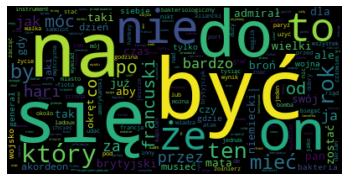

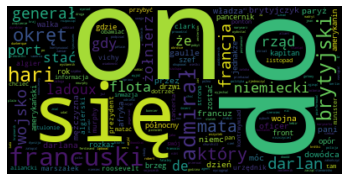

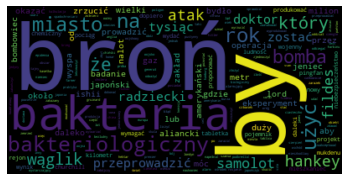

In [ ]:
# b)Przedstawić w postaci chmury tagów słowa należące do każdego tematu (wielkość słowa powinna odpowiadać sile związku słowa z tematem)
import sklearn.decomposition as skd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trsvd = skd.TruncatedSVD(n_components=3)
U = trsvd.fit_transform(dtm) 
VT = trsvd.components_ 
words = vec.get_feature_names()
# df = pd.DataFrame(VT, columns=dtm.columns, index=topics)
with open('polish_stopwords', 'r') as f:
    sw = f.read().split()
sw = set(sw)
for topic in VT:
  wc_words = {}
  for i in range(len(topic)):
    wc_words[words[i]] = topic[i]
  wc = WordCloud( background_color ='black', 
                  stopwords = sw, ).generate_from_frequencies(wc_words)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()

[105.17633609 -50.60051394 -19.91014974]


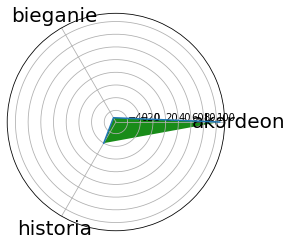

[110.55925229 -60.70474699 -21.36512096]


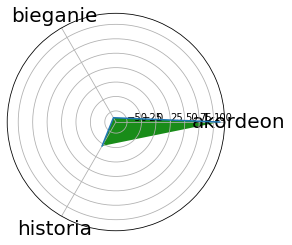

[40.96744962 -1.68656371  4.36519934]


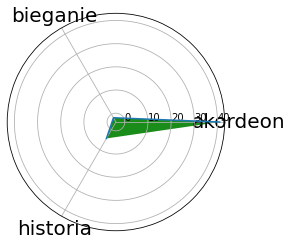

[20.01339021 -1.7738895   3.2044966 ]


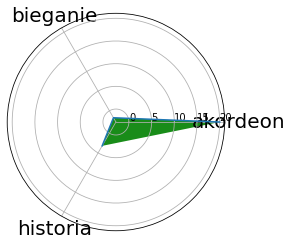

[34.36278161 -5.64717011  3.49825192]


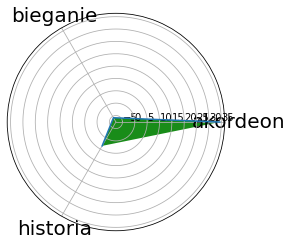

[ 85.91892538 -40.77478249 -18.90297688]


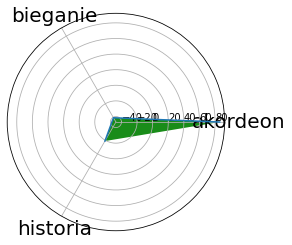

[151.98555772  72.34624703  -0.69667275]


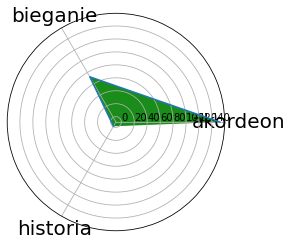

[162.06138219 -14.26634464  78.46584033]


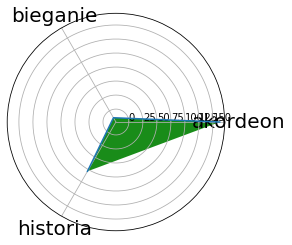

[162.25682825  44.07740942 -42.48363627]


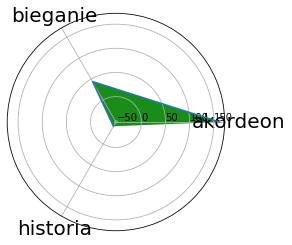

In [ ]:
# c) przedstawić w postaci wykresu radarowego tematy każdego z dokumentów
from math import pi
for doc in U:  
  # kąt
  angle = [n / float(3) * 2 * pi for n in range(3)]
  ax = plt.subplot(111, polar=True)
  # rysowanie 
  topics = ['akordeon', 'bieganie', 'historia']
  plt.xticks(angle, topics, color='black', size=20)
  ax.set_rlabel_position(0)
  
  print(doc)
  ax.plot(angle, doc)
  ax.fill(angle, doc, 'g', alpha=0.9)
  plt.show()